## Childhood Mortality and the UN Millenium Development Goals

The UN Millenium Goals were 8 ambitious targets established by world leaders at the UN Millenium Summit. All 8 were intended to improve overall health, education and living conditions worldwide. Using 1990 as a baseline, Goal 4 was to achieve a 2/3 reduction in childhood mortality by 2015. Key indicators for this goal were the Under-5 Mortality Rates and Infant Mortality Rates compiled by United Nations International Children's Emergency Fund (UNICEF) and the World Health Organization (WHO).

Childhood mortality is down by over 50% since 1990. Despite this tremendous progress, 5.9 million children still died before reaching the age of 5 in 2015. I am interested in understanding which countries did not reach the 2/3 goal to ultimately better understand the underlying determinants of childhood survival. Infant mortality is a subset of Under-5 mortality. By comparing the data from the two groups, I was hope to understand if childhood mortality primarily occurred before the age of 1.

The World Bank maintains a Health, Nutrition and Population Data and Statistics (HealthStats) time-series dataset compiled from a variety of sources, including the childhood mortality indicators listed above. Data is available by country, by region and by high, middle and low income groups for 1960-2015. I used this dataset to explore changes in rates of childhood mortality between 1990 and 2015 by country and worldwide.
(http://data.worldbank.org/data-catalog/health-nutrition-and-population-statistics)


## Questions
1. Which countries rates are not meeting the 2/3 reduction in mortality mandated by the UN Millenium Goals? 
2. Zambia and Zimbabwe are both in southern Africa and have a similar population size. But, Zambia's childhood mortality is dropping much more quickly based on 1990 and 2015 data. What does under-5 and infant related mortality look like for each country between 1960 or 2015? Does this provide any clues into the observed difference?
3. Infant mortality is a subset of overall childhood mortality. Are there countries where infant to under-5 mortality aren't strongly correlated? 



In [115]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [116]:
df = pd.read_csv('data.csv')

In [117]:
# Process the data to remove null values

# Count the number of values per row
for record in df:
  df['full_count'] = df.count(axis=1, level=None, numeric_only=False)
  
# Create a new Data Frame that only includes rows with >60 values and values for countries - not regional
df2 = df.ix[14145:, :]
df3 = df2.ix[lambda df2: df2['full_count'] > 60]


# Create a new Data frame that only includes indicators for Mortality rate under 5 and mortality rate infant
indicatorsInclude = ['Mortality rate, under-5 (per 1,000)', 'Mortality rate, infant (per 1,000 live births)']
df_mortality = df3.ix[lambda df3: df3['Indicator Name'].isin(indicatorsInclude),:]


df_under_5 = df_mortality.ix[lambda df_mortality: df_mortality['Indicator Name'] == 'Mortality rate, under-5 (per 1,000)', :]
df_infant_mortality = df_mortality.ix[lambda df_mortality: df_mortality['Indicator Name'] == 'Mortality rate, infant (per 1,000 live births)', :]

# Get regional data only
df4 = df.ix[:14144, :]
df_regional = df4.ix[lambda df: df['full_count'] >60]
df_regional_under_5 = df_regional.ix[lambda df_regional: df_regional['Indicator Name'] == 'Mortality rate, under-5 (per 1,000)',:]
df_regional_infant_mortality = df_regional.ix[lambda df_regional: df_regional['Indicator Name'] == 'Mortality rate, infant (per 1,000 live births)',:]


### Descriptive Statistics 
1. What are the mean, mode, median values of under 5 and infant mortality for all countries in 1990 and 2015
2. How much does mortality vary by country?


In [118]:
# Summary Statistics - Central Tendency

mean_child_mortality_1990 = df_under_5['1990'].mean()
median_child_mortality_1990 = np.median(df_under_5['1990'])
#mode_child_mortality_1990 = statistics.mode(df_under_5['1990'])
(values, counts) = np.unique(df_under_5['1990'], return_counts=True)
ind = np.argmax(counts)
mode_child_mortality_1990 = values[ind]


print("Mean Child Mortality in 1990:", mean_child_mortality_1990)
print("Median Child Mortality in 1990:", median_child_mortality_1990)
print("Mode Child Mortality in 1990", mode_child_mortality_1990)

mean_child_mortality_2015 = df_under_5['2015'].mean()
median_child_mortality_2015 = np.median(df_under_5['2015'])
(values2, counts2) = np.unique(df_under_5['2015'], return_counts=True)
ind = np.argmax(counts2)
mode_child_mortality_2015 = values2[ind]

print("Mean Child Mortality in 2015:", mean_child_mortality_2015)
print("Median Child Mortality in 2015", median_child_mortality_2015)
print("Mode Child Mortality in 2015", mode_child_mortality_2015)

Mean Child Mortality in 1990: 65.0071428571
Median Child Mortality in 1990: 40.65
Mode Child Mortality in 1990 8.3
Mean Child Mortality in 2015: 29.9153061224
Median Child Mortality in 2015 19.15
Mode Child Mortality in 2015 3.5


In [119]:
## Summary Statistics - Variance

var_child_mortality_1990 = np.var(df_under_5['1990'])
std_child_mortality_1990 = np.std(df_under_5['1990'], ddof=1)
print("Variance Child Mortality in 1990:", var_child_mortality_1990)
print("Standard Deviation Child Mortality in 2015", std_child_mortality_1990)

var_child_mortality_2015 = np.var(df_under_5['2015'])
std_child_mortality_2015 = np.std(df_under_5['2015'], ddof=1)
print("Variance Child Mortality in 2015:",var_child_mortality_2015)
print("Standard Deviation Child Mortality in 2015:", std_child_mortality_2015)

Variance Child Mortality in 1990: 3751.63331633
Standard Deviation Child Mortality in 2015 61.5654931634
Variance Child Mortality in 2015: 871.073949396
Standard Deviation Child Mortality in 2015: 29.6657056751


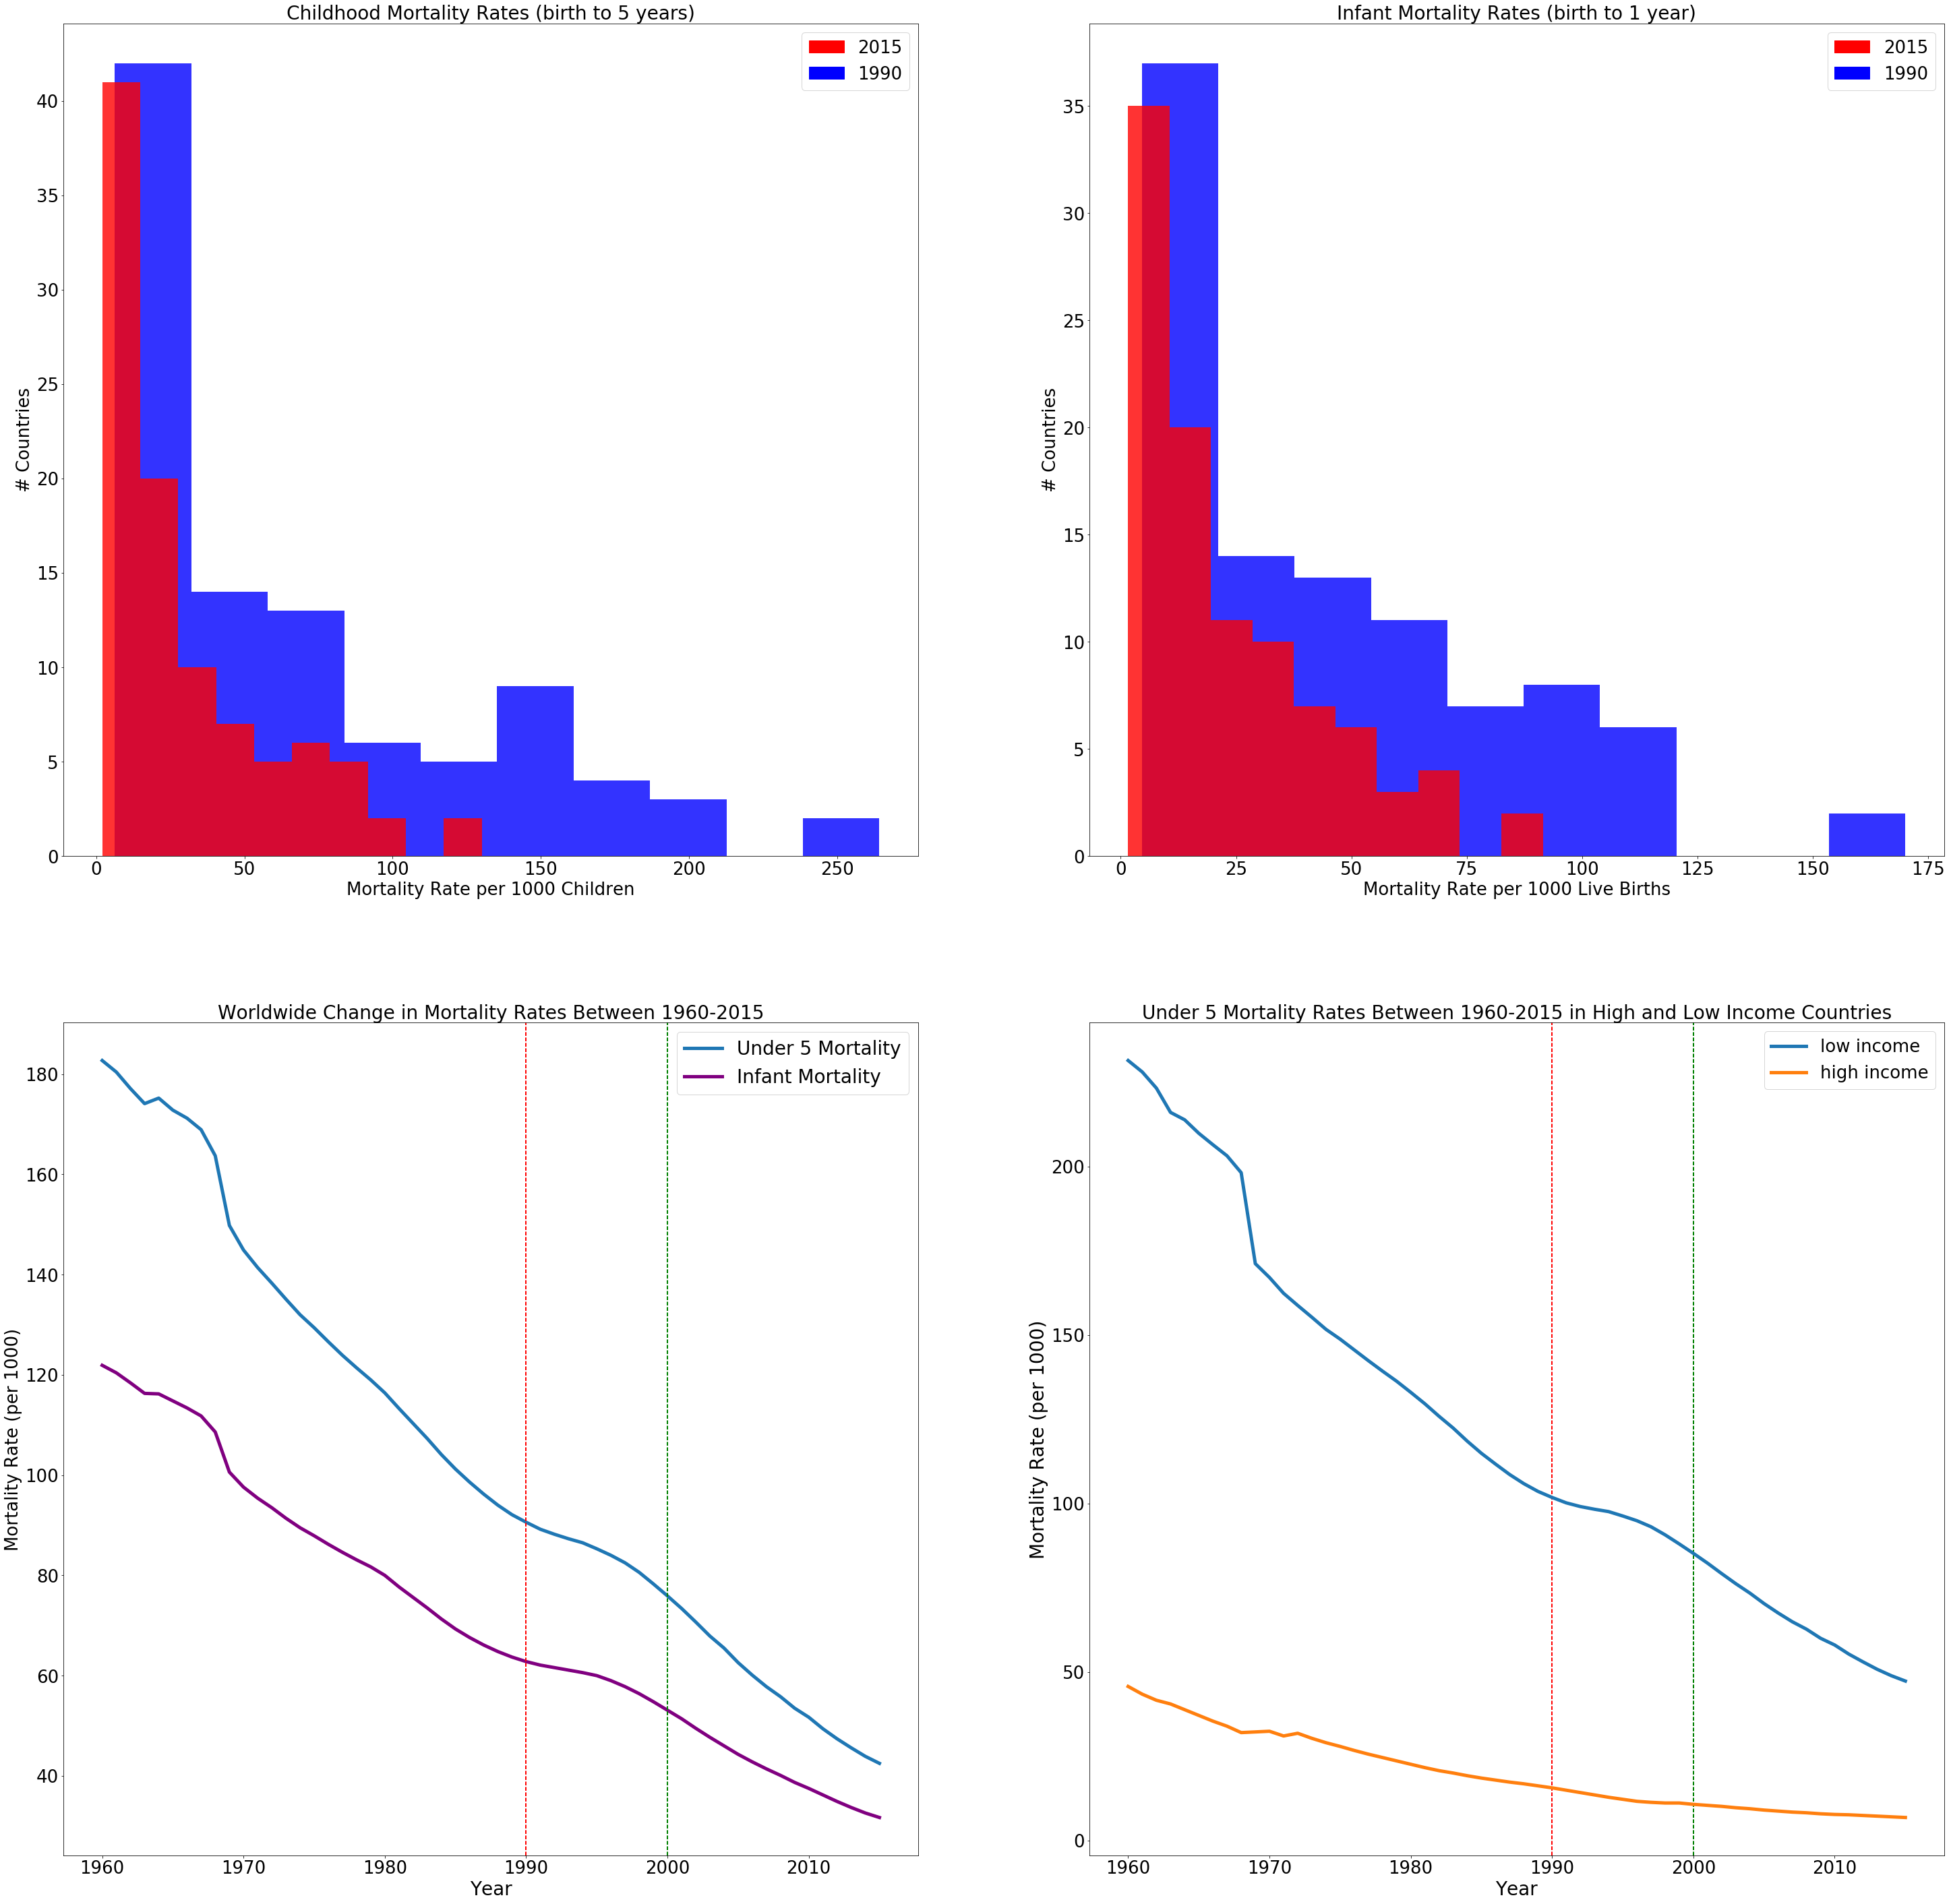

In [157]:
plt.figure(figsize=(50,50))


df_regional_under_5_limited = df_regional_under_5.drop(['Country Name','Country Code', 'Indicator Name', 'Indicator Code', 'full_count'], axis=1)
df_world_under_5 = df_regional_under_5_limited.ix[13991]


df_regional_infant_mortality_limited = df_regional_infant_mortality.drop(['Country Name','Country Code', 'Indicator Name', 'Indicator Code', 'full_count'], axis=1)
df_world_infant = df_regional_infant_mortality_limited.ix[13987]


plt.subplot(2,2,1)
plt.hist(x = df_under_5['1990'],color='blue', alpha=0.8)
plt.ylabel('# Countries', fontsize=26)
plt.xlabel('Mortality Rate per 1000 Children', fontsize=26)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.hist(x = df_under_5['2015'],color='red', alpha=0.8)
plt.title('Childhood Mortality Rates (birth to 5 years)', fontsize=28)

blue_patch = mpatches.Patch(color='blue', label='1990')
red_patch = mpatches.Patch(color='red', label='2015')

plt.legend(handles=[red_patch,blue_patch], fontsize=26)

plt.subplot(2,2,2)
plt.hist(x = df_infant_mortality['1990'],color='blue', alpha=0.8)
plt.title('Infant Mortality Rates (birth to 1 year)', fontsize=28)
plt.ylabel('# Countries', fontsize=26)
plt.xlabel('Mortality Rate per 1000 Live Births', fontsize=26)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.hist(x = df_infant_mortality['2015'],color='red', alpha=0.8)
blue_patch = mpatches.Patch(color='blue', label='1990')
red_patch = mpatches.Patch(color='red', label='2015')
plt.legend(handles=[red_patch,blue_patch],fontsize=26)


plt.subplot(2,2,3)

#plot line graph of mortality rate under_5,infant world add lines at 1990 and 2015
plt.plot(df_world_under_5, linewidth=5, label='Under 5 Mortality')
plt.plot(df_world_infant, linewidth=5, color='purple', label='Infant Mortality')
plt.title('Worldwide Change in Mortality Rates Between 1960-2015', fontsize=28)
plt.ylabel('Mortality Rate (per 1000)', fontsize=26)
plt.legend(fontsize=28)
plt.xlabel('Year', fontsize=28)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.axvline(x=1990, linewidth=2, linestyle='dashed',color = 'r')
plt.axvline(x=2000, linewidth=2, linestyle='dashed',color = 'g')


plt.subplot(2,2,4)
df_low_income = df_regional_under_5.ix[lambda df_regional_under_5: df_regional_under_5['Country Name'] == 'Low & middle income',:]
df_high_income = df_regional_under_5.ix[lambda df_regional_under_5: df_regional_under_5['Country Name'] == 'High income',:]
df_low_income2 = df_low_income.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','full_count'], axis =1)
df_high_income2 = df_high_income.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','full_count'], axis =1)
df_low_income3 = df_low_income2.T
df_high_income3 = df_high_income2.T

plt.axvline(x=1990, linewidth=2, linestyle='dashed',color = 'r')
plt.axvline(x=2000, linewidth=2, linestyle='dashed',color = 'g')

plt.plot(df_low_income3, linewidth=5, label='low income')
plt.plot(df_high_income3, linewidth=5, label= 'high income')
plt.title('Under 5 Mortality Rates Between 1960-2015 in High and Low Income Countries', fontsize=28)
plt.ylabel('Mortality Rate (per 1000)', fontsize=28)
plt.xlabel('Year', fontsize=28)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.legend(fontsize=26)


### Analysis

Mortality rates by country are not normally distributed. A large number of countries have mortality between 0-25/1000 for both children and infants followed by a long tail of increasing mortality rates for. Worldwide mortality rates for infants and children have fallen fairly steadily since the 1960s. The rates seem to level off in the early 1990s before dropping off again in the 1990s to early 2000s. Most of the decrease in mortality has been in low income countries which continue to have higher mortality than high income countries did over 50 years ago.

## 1. Which countries are not meeting the Millenium Goals?


c:\program files (x86)\python36-32\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files (x86)\python36-32\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files (x86)\python36-32\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


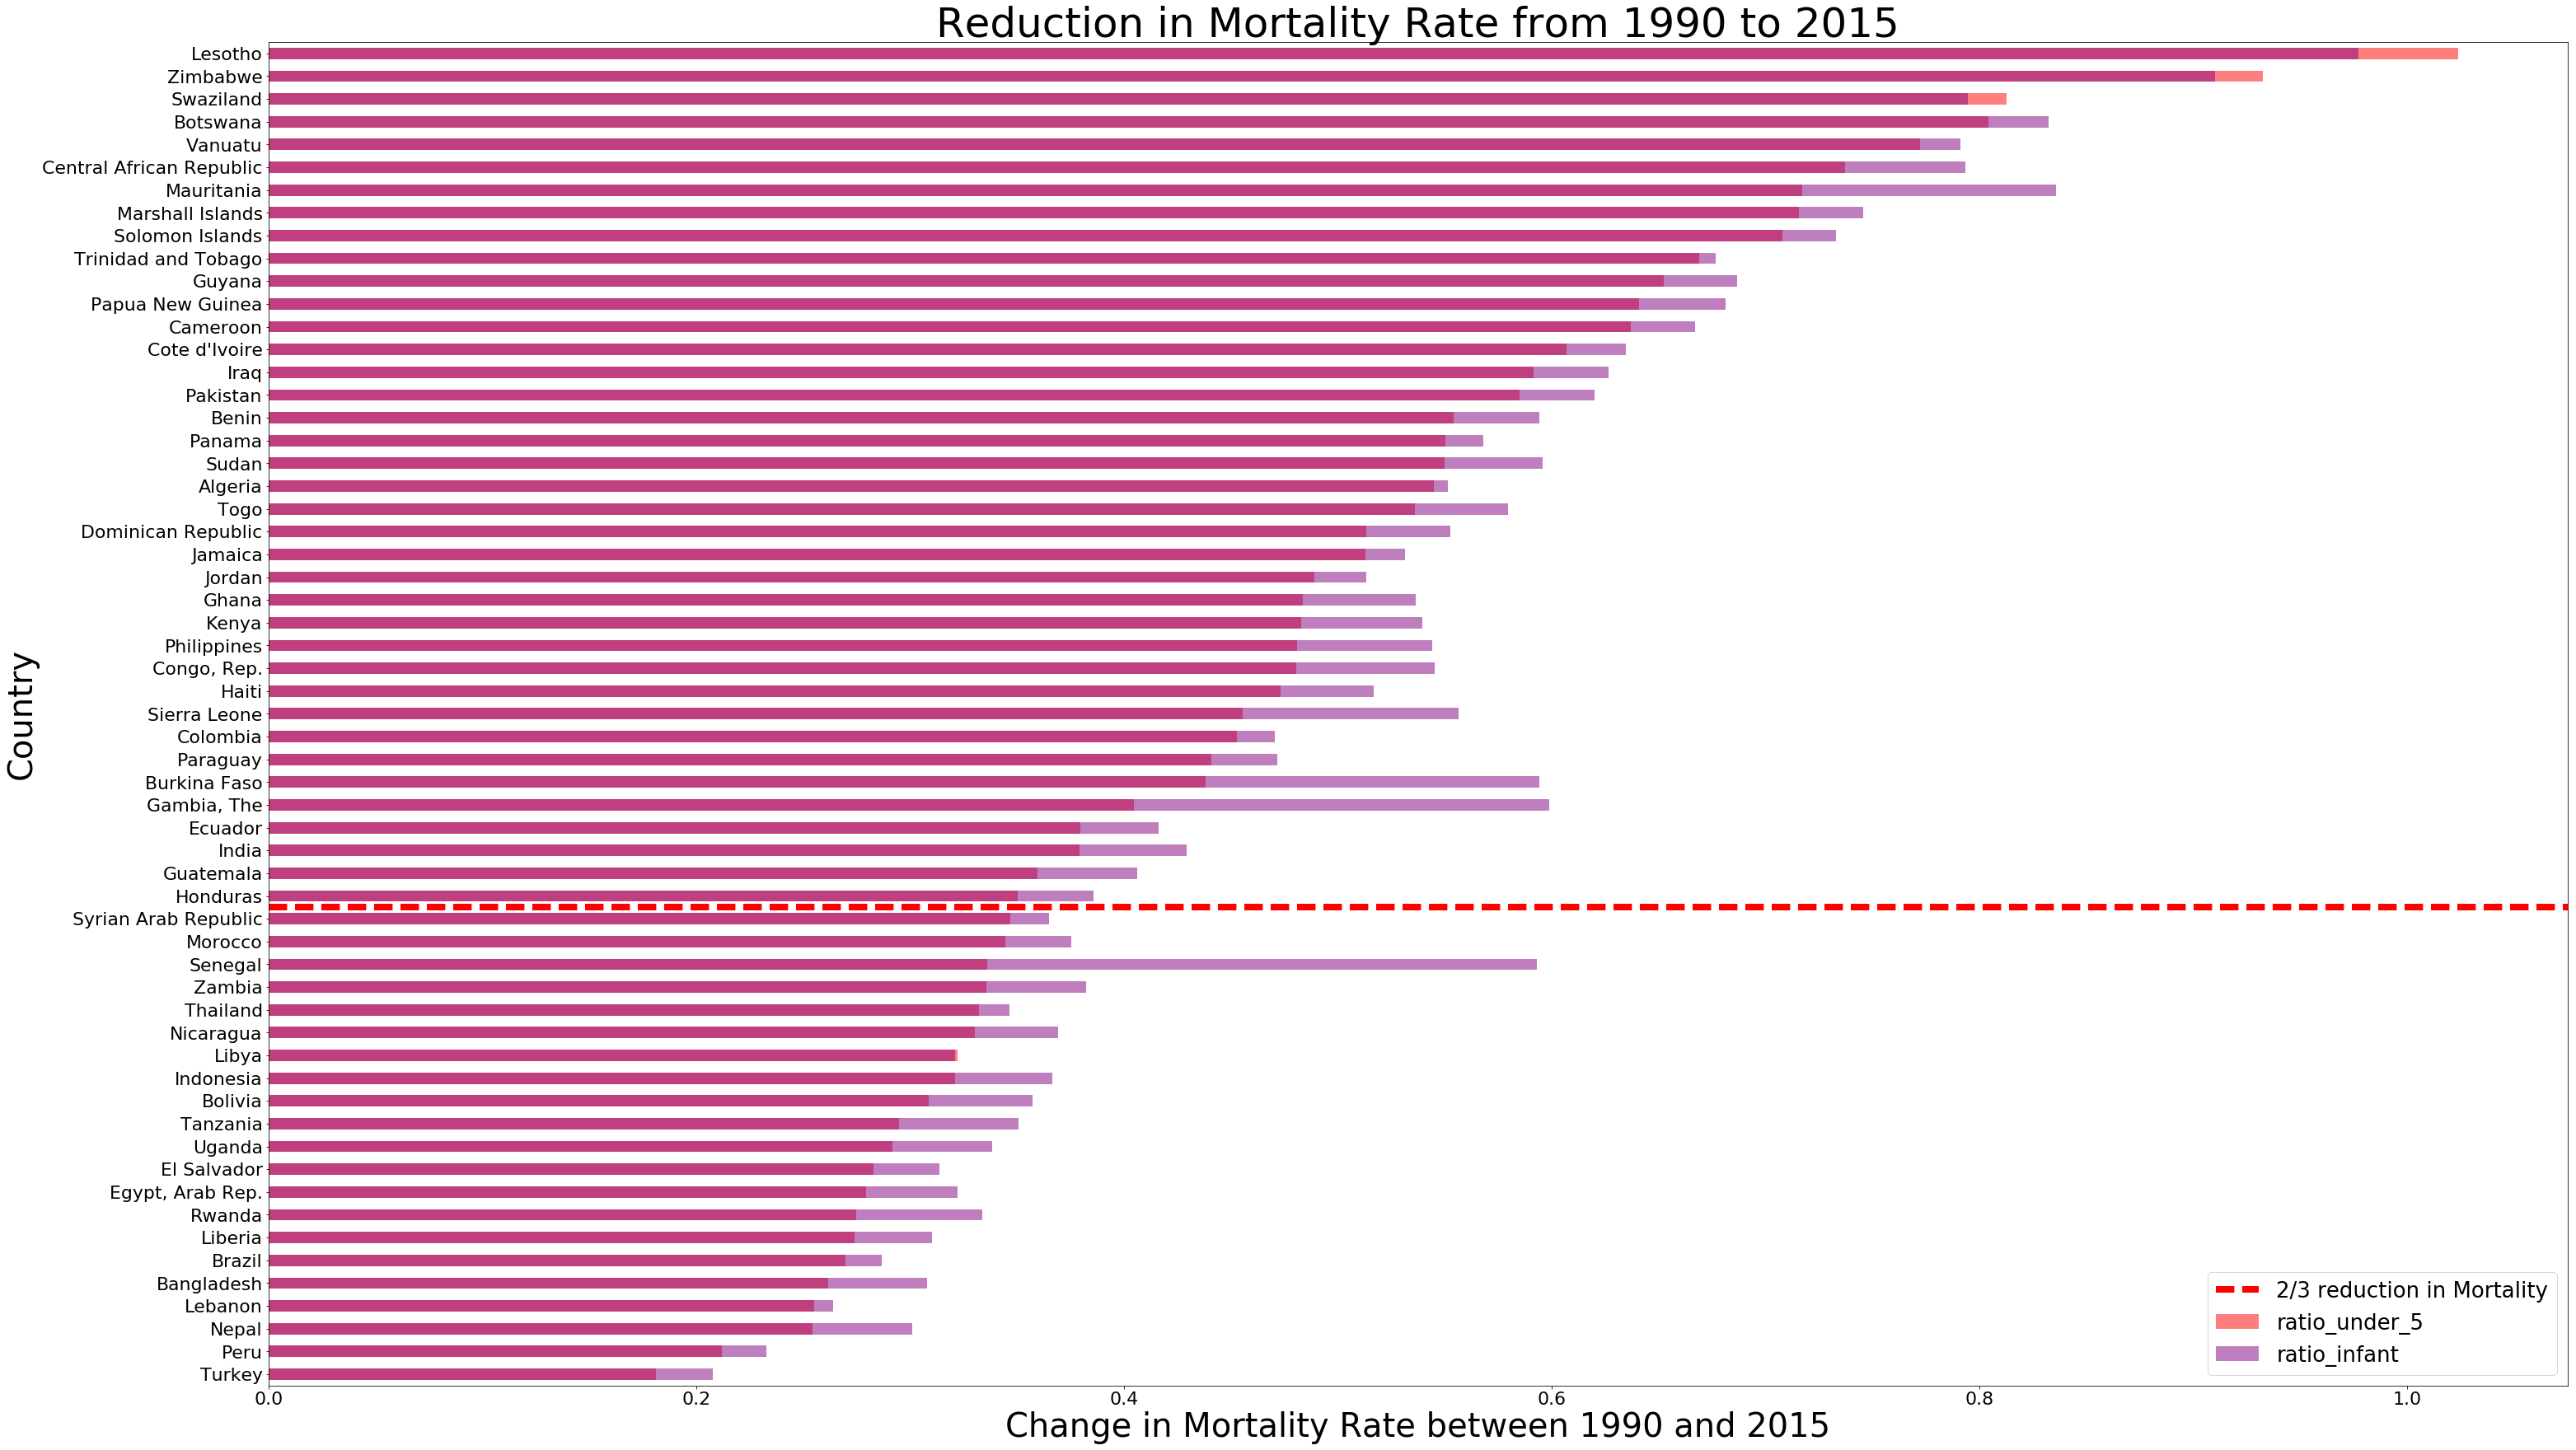

In [159]:
#Removing countries that had low under_5 and infant mortality in 1990
df_high_mortality = df_mortality.ix[lambda df_mortality: df_mortality['1990']  > 25]
df_high_infant_mortality = df_high_mortality.ix[lambda df_high_mortality: df_high_mortality['Indicator Name'] == 'Mortality rate, infant (per 1,000 live births)',:]
df_high_under_5_mortality = df_high_mortality.ix[lambda df_high_mortality: df_high_mortality['Indicator Name'] == 'Mortality rate, under-5 (per 1,000)',:]

df_high_infant_mortality['ratio_infant'] = [x/y for x,y in zip(df_high_infant_mortality['2015'], df_high_infant_mortality['1990'])]
df_high_under_5_mortality['ratio_under_5'] = [x/y for x,y in zip(df_high_under_5_mortality['2015'], df_high_under_5_mortality['1990'])]


#Calculate the reduced mortality between 1990 and 2015
df_high_infant_mortality.index = df_high_infant_mortality['Country Name']
df_high_under_5_mortality.index = df_high_under_5_mortality['Country Name']
df_combined_result = pd.concat([df_high_infant_mortality['Country Name'], df_high_infant_mortality[
    'ratio_infant'],df_high_under_5_mortality['ratio_under_5']], axis=1, join_axes=[df_high_infant_mortality.index])

#Sort by ratio value
df_sorted_mort = df_combined_result.sort(['ratio_under_5'], ascending=[1])
df_sorted_mort.index = df_sorted_mort['Country Name']

#Plot stacked bar chart for infant and under 5 mortality
ax = df_sorted_mort['ratio_under_5'].plot(kind='barh', color='red', alpha=0.5)
ax2 = df_sorted_mort['ratio_infant'].plot(kind='barh',figsize=(50, 30), legend=True, fontsize=22, color='purple', alpha =0.5, stacked='True')
ax.set_title("Reduction in Mortality Rate from 1990 to 2015", fontsize=50)
ax.set_ylabel("Country", fontsize=40)
ax.set_xlabel("Change in Mortality Rate between 1990 and 2015", fontsize=40)
plt.axhline(y=20.5, linewidth=8, linestyle='dashed',color = 'r', label='2/3 reduction in Mortality')
plt.legend(fontsize=26,loc=4)


### Analysis
Countries above the red dashed line did not meet the UN Millenium Goal of reducing childhood mortality by 2/3 between 1990 and 2015. Lesotho's childhood mortality experienced a slight increase between those two years and the top 4 least responsive countries to a reduction in childhood mortality are all in southern Africa. Interestingly, Zambia, another southern African country did reduce childhood mortality by over 2/3.

## 2. Time series Comparison of Zambia and Zimbabwe


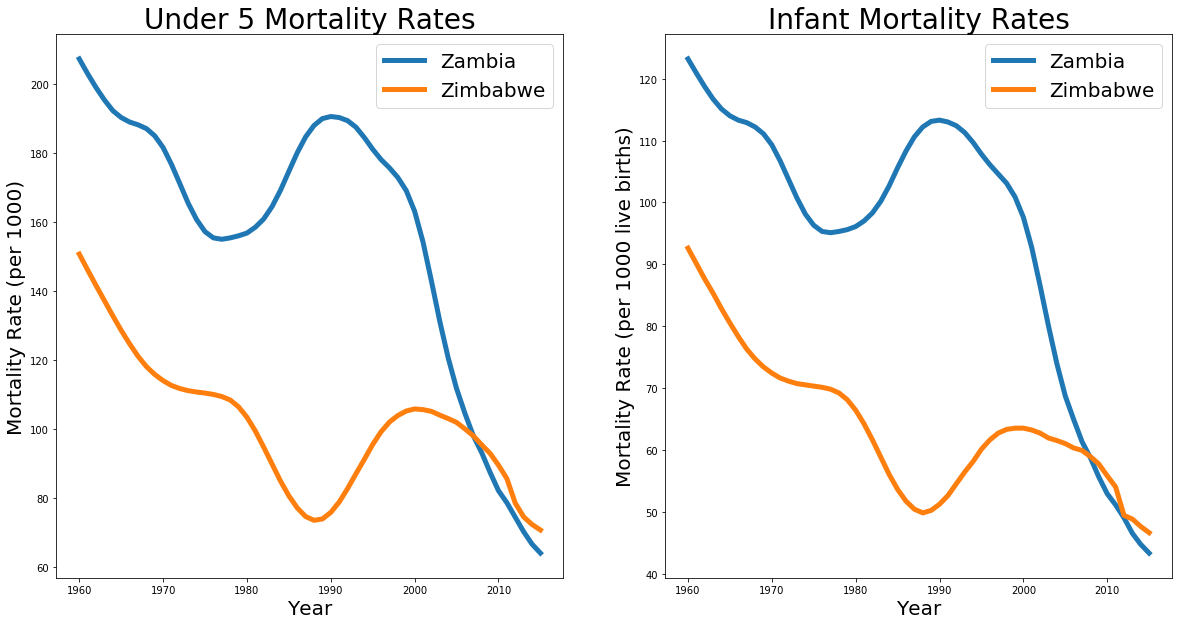

In [142]:
df_sorted_mort_Zambia = df_under_5.ix[lambda df: df_under_5['Country Name'] == 'Zambia',:]
df_mort_Zambia = df_sorted_mort_Zambia.drop(['Country Name', 'Indicator Name','Country Code', 'Indicator Code','full_count'], axis=1)
df_sorted_infant_Zambia = df_infant_mortality.ix[lambda df: df_infant_mortality['Country Name'] == 'Zambia',:]
df_infant_Zambia = df_sorted_infant_Zambia.drop(['Country Name','Country Code','Indicator Name', 'Indicator Code','full_count'], axis=1)

df_sorted_mort_Zimbabwe = df_under_5.ix[lambda df: df_under_5['Country Name'] == 'Zimbabwe',:]
df_mort_Zimbabwe = df_sorted_mort_Zimbabwe.drop(['Country Name', 'Indicator Name','Country Code','Indicator Code','full_count'], axis=1)
df_sorted_infant_Zimbabwe = df_infant_mortality.ix[lambda df: df_infant_mortality['Country Name'] == 'Zimbabwe',:]
df_infant_Zimbabwe = df_sorted_infant_Zimbabwe.drop(['Country Name','Country Code', 'Indicator Name','Indicator Code','full_count'], axis=1)


df_mort_Zambia2 =df_mort_Zambia.T
df_mort_Zimbabwe2 = df_mort_Zimbabwe.T
df_infant_Zambia2 = df_infant_Zambia.T
df_infant_Zimbabwe2 = df_infant_Zimbabwe.T
plt.figure(figsize=(20,10))


plt.subplot(1,2,1)

plt.plot(df_mort_Zambia2, linewidth=5, label='Zambia')
plt.ylabel('Mortality Rate (per 1000)', fontsize=20)
plt.plot(df_mort_Zimbabwe2, linewidth=5, label='Zimbabwe')
plt.title('Under 5 Mortality Rates',fontsize=28)
plt.xlabel('Year', fontsize=20)
plt.legend(fontsize=20)

plt.subplot(1,2,2)
plt.plot(df_infant_Zambia2, linewidth=5, label='Zambia')
plt.plot(df_infant_Zimbabwe2, linewidth=5, label='Zimbabwe')
plt.title('Infant Mortality Rates', fontsize=28)
plt.ylabel('Mortality Rate (per 1000 live births)', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(fontsize=20)

plt.show()



### Analysis:  
Zambia's mortality rates went up between 1980 to a peak in 1990. After 1990, there was a substantial decrease in childhood and infant mortality rates ultimately leading to lower rates than Zimbabwe. Conversely, Zimbabwe was at an all-time low in mortality around 1990 before increasing again to 2000. Zimbabwe's mortality rates fell after the implementation of the Millenium Goals but not at the same rate as Zambia. The differences observed between 1990 and 2015 are partly due to the local minima in Zimbabwe and local maxima in mortality rates in Zambia occurring right around 1990. 

## 3. Are there countries where infant mortality is decreasing more slowly than overall under-5 mortality?

The average reduction in infant mortality: 0.51782958007 (standard deviation: 0.180789740135 )
The average reduction in under 5 mortality: 0.47508952756 (standard deviation: 0.186932313252 )


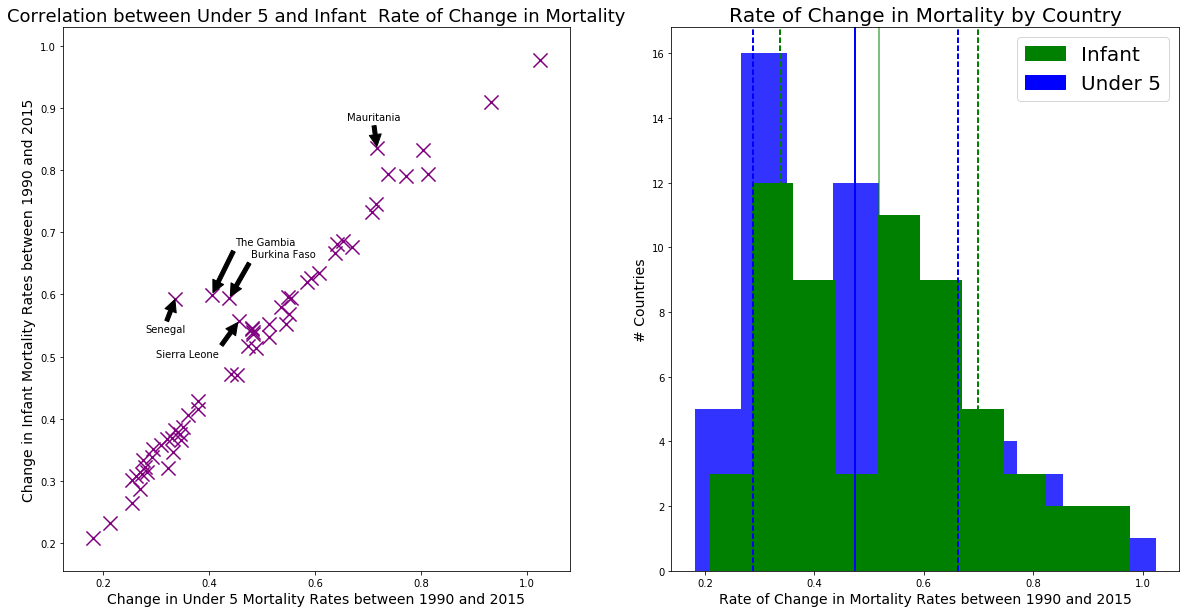

In [184]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(x = df_combined_result['ratio_under_5'], y = df_combined_result['ratio_infant'], color = 'purple', marker = 'x', s = 200)
plt.xlabel('Change in Under 5 Mortality Rates between 1990 and 2015', fontsize=14)
plt.ylabel('Change in Infant Mortality Rates between 1990 and 2015', fontsize=14)
plt.title('Correlation between Under 5 and Infant  Rate of Change in Mortality', fontsize=18)

plt.annotate('The Gambia', xy=(.405, .599), xytext=(.45, .68),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('Senegal', xy=(.336, .593), xytext=(.28,.54),arrowprops=dict(facecolor='black', shrink=0.03),)
plt.annotate('Sierra Leone', xy=(.456, .557), xytext=(.3, .5),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('Burkina Faso', xy=(.438, .594), xytext=(.48, .66),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Mauritania', xy=(.717, .836), xytext=(.66, .88),arrowprops=dict(facecolor='black', shrink=0.05))

mean_infant = np.mean(df_combined_result['ratio_infant'])
std_infant = np.std(df_combined_result['ratio_infant'])
mean_under_5 = np.mean(df_combined_result['ratio_under_5'])
std_under_5 = np.std(df_combined_result['ratio_under_5'])
print('The average reduction in infant mortality:', mean_infant, '(standard deviation:',std_infant,')')
print('The average reduction in under 5 mortality:', mean_under_5, '(standard deviation:', std_under_5,')')

plt.subplot(1,2,2)
plt.hist(x = df_combined_result['ratio_under_5'],color='blue', alpha=0.8)
plt.hist(x = df_combined_result['ratio_infant'], color='green')
plt.axvline(x=mean_infant, linewidth=2, linestyle='solid',color = 'green', alpha=0.5)
plt.axvline(x=mean_infant+std_infant, linewidth=2, linestyle='dashed',color = 'green')
plt.axvline(x=mean_infant-std_infant, linewidth=2, linestyle='dashed',color = 'green')
plt.axvline(x=mean_under_5, linewidth=2,linestyle='solid', color = 'blue')
plt.axvline(x=mean_under_5+std_under_5, linewidth=2,linestyle='dashed', color = 'blue')
plt.axvline(x=mean_under_5-std_under_5, linewidth=2,linestyle='dashed', color = 'blue')
blue_patch = mpatches.Patch(color='blue', label='Under 5')
green_patch = mpatches.Patch(color='green', label='Infant')
plt.xlabel('Rate of Change in Mortality Rates between 1990 and 2015', fontsize=14)
plt.ylabel('# Countries', fontsize=14)
plt.title('Rate of Change in Mortality by Country', fontsize=20)
plt.legend(handles=[green_patch,blue_patch],fontsize=20)
plt.show()

### Analysis

There is an overall strong correlation between the change in mortality rates for children under 5 and the change in mortality rates for infants. This isn't surprising given that infant mortality (under the age of 1) is a subset of under_5 mortality.  Five countries, all in West Africa have had a slower decrease in infant mortality compared to the overall rate of under_5 mortality.   

## Next Steps

The wealth of a given country appears to have a large impact on childhood mortality. According to the World Bank, Zambia's Gross Domestic Product (GDP) has steadily increased from $419.19 in 1990 to $1844.80 in 2013. Zimbabwe's GDP started at $839.61 in 1990 and decreased to a low of $345.41 in 2008 and has only recently recovered to $953.38 in 2013. The change in GDP seems to correlate with the increase in childhood survival. My first next step would be to combine the HealthStats dataset with the World Bank time series data on GDP to further investigate the response to national wealth and survival. (http://databank.worldbank.org/data/reports.aspx?source=world-development-indicators)
Next, I'd like to use UNICEF data on causality (disease, injury, malnutrition) and WHO data on pollution (including access to clean water, air pollution) to identify different risks that may be affecting survivability outcomes by country and region. It would be interesting in particular to look at why western African countries have a slower decrease infant mortality relative to overall childhood mortality.
